1.1194364010865997e-09 1.4722649253161982e-24


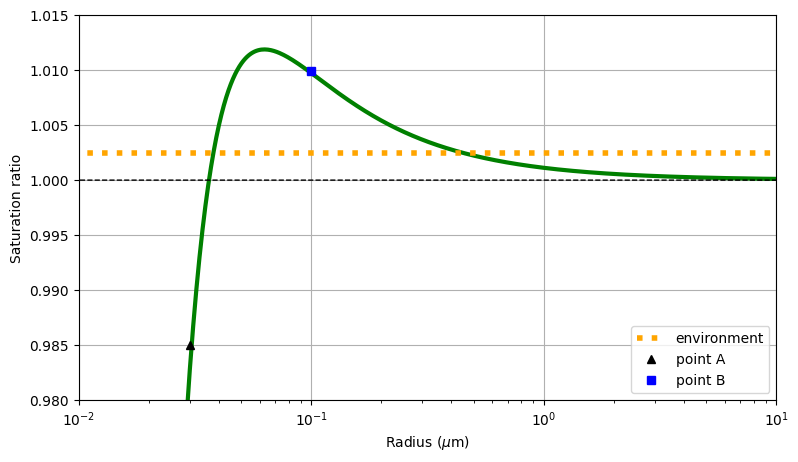

In [19]:
import numpy as np
import matplotlib.pyplot as plt

## Time variables
nt           = 10000   ## Increasing tau

## Output variables (array)
rad         = np.zeros(nt)    ## radius droplet 
one         = np.zeros(nt)    ## radius droplet 
s           = np.zeros(nt)    ## equilibrium saturation ratio 

sigma       = 7.5e-02            ## Surface tension of water [N m-1]
ifv         = 2                  ## van't hoff factor
Rv          = 482.0              ## specific gas constant for water vapour
rhowater    = 1000.              ## density water [kg m-3]

## CCN composition of sodium chloride
cf          = 1e-03              ## conversion factor from grams to kg
m_Na        = 22.99*cf           ## sodium atomic mass [g mol-1]
m_Cl        = 35.45*cf           ## clhor atmomic mass [g mol-1]
m_H         =  1.01*cf           ## hydrogen atmomic mass [g mol-1]
m_O         = 16.0 *cf           ## oxygen atmomic mass [g mol-1]

molar_s     =   m_Na + m_Cl
molar_w     = 2*m_H  + m_O

## Specific considtions solute and temperature
T           = 278               ## temperature
ms          = 1.e-17*cf         ## solute mass

## Köhler curve 
a           = (2*sigma)/(rhowater * Rv * T)
b           = (3*ifv*ms*molar_w)/(4*np.pi*rhowater*molar_s)

print(a, b)

## Tendencies
for r in range(1,nt):
	rad[r]      = 0.001*r
	rad[r]      = rad[r]*1e-06   ## units meter 
	one[r]      = 1          
	s[r]      = 1. + (a/rad[r]) - (b/(rad[r]**3))  
    
## Plotting results
sse = 1.0025

plt.figure(1, figsize=(9,5))
plt.semilogx(rad*1e06, s, 'g-', lw=3)
plt.semilogx(rad*1e06, one, 'k--',lw=1)
leg1 = plt.legend(loc=2)
leg1.draw_frame(False)
plt.grid()
plt.axis([0.01,10.,0.98,1.015])
plt.xlabel('Radius ($\mu$m)')
plt.ylabel('Saturation ratio')
#vlines(0.06,0, 1.012, linestyle="dashed")
plt.hlines(sse,0, 10, linestyle="dotted", color='orange', label ='environment', lw=4)
plt.plot(0.03,0.985,'k^', label ='point A')
plt.plot(0.10,1.0099,'bs', label ='point B')
plt.legend(loc='lower right')
plt.savefig('Figures/kohler.pdf', bbox_inches='tight')

In [21]:
ract = np.sqrt(3*b/a)
ract/1e-6

np.float64(0.06281363083482268)